In [2]:
"""
Logistic Regression on diabetes.csv (Pima Indians Diabetes Dataset)

This script / notebook:
- Loads the dataset
- Does some quick exploration
- Trains a Logistic Regression classifier
- Evaluates it with accuracy, confusion matrix, and ROC curve
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)



In [3]:
# -----------------------------
# 1. Load the dataset
# -----------------------------

df = pd.read_csv("diabetes.csv")

print("First five rows:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())



First five rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


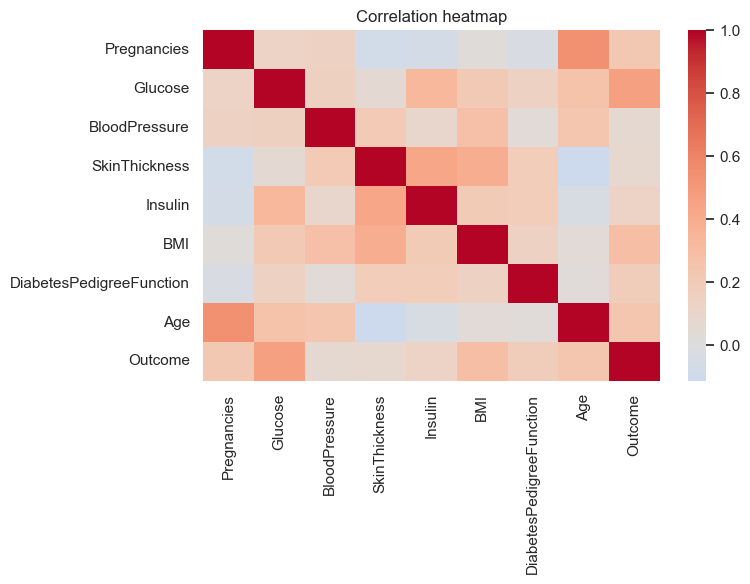

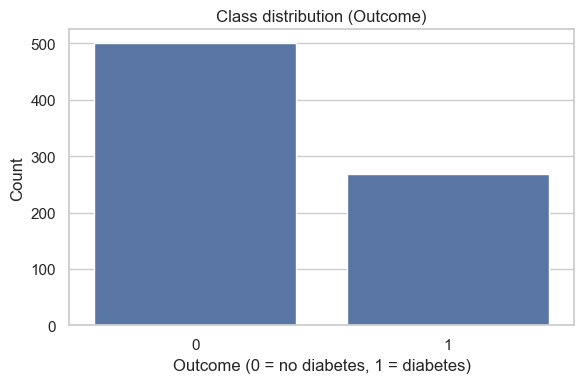

In [ ]:
# -----------------------------
# 2. Basic checks & target
# -----------------------------

# Most Pima diabetes datasets have 'Outcome' as target (0 = no diabetes, 1 = diabetes).
if "Outcome" not in df.columns:
    raise ValueError("Expected a column named 'Outcome' as the target variable.")

target_col = "Outcome"

X = df.drop(columns=[target_col])
y = df[target_col]

print("\nFeature columns:", list(X.columns))
print("Target distribution:")
print(y.value_counts())

# -----------------------------
# 3.  visualisation
# -----------------------------

# Correlation heatmap (just to see relationships)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

# Distribution of the target
sns.countplot(x=y)
plt.title("Class distribution (Outcome)")
plt.xlabel("Outcome (0 = no diabetes, 1 = diabetes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




In [5]:
# -----------------------------
# 4. Train–test split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # keep class balance similar in train and test
)

print(f"\nTrain size: {X_train.shape[0]} samples")
print(f"Test size:  {X_test.shape[0]} samples")




Train size: 614 samples
Test size:  154 samples


In [7]:
# -----------------------------
# 5. Feature scaling
# -----------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [8]:
# -----------------------------
# 6. Fit Logistic Regression
# -----------------------------

# C controls regularisation strength (inverse). Larger C = less regularisation.
log_reg = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver="lbfgs",
)

log_reg.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)


Test accuracy: 0.714

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



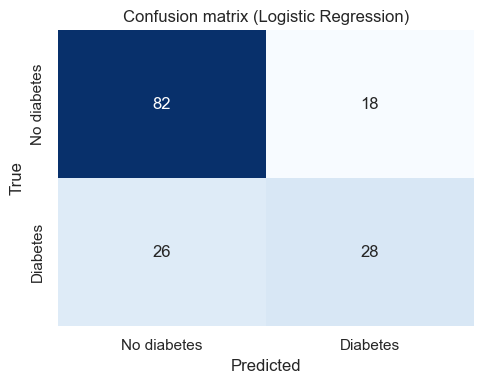

In [9]:
# -----------------------------
# 7. Evaluation on test set
# -----------------------------

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {acc:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["No diabetes", "Diabetes"],
    yticklabels=["No diabetes", "Diabetes"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix (Logistic Regression)")
plt.tight_layout()
plt.show()



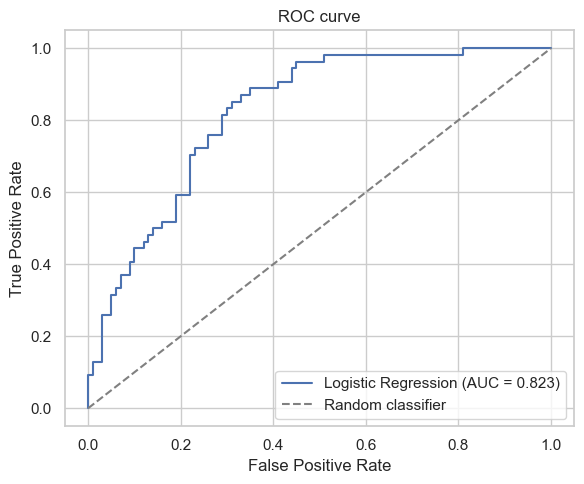

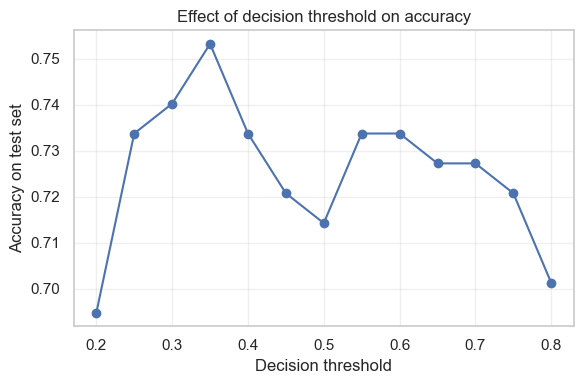

In [10]:
# -----------------------------
# 8. ROC curve & AUC
# -----------------------------

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Effect of decision threshold (optional)
# -----------------------------

# By default, sklearn uses 0.5 as the threshold. Let's see how accuracy changes
# if we slide the threshold.

thresholds_to_try = np.linspace(0.2, 0.8, 13)
accs = []

for thr in thresholds_to_try:
    y_pred_thr = (y_proba >= thr).astype(int)
    acc_thr = accuracy_score(y_test, y_pred_thr)
    accs.append(acc_thr)

plt.figure(figsize=(6, 4))
plt.plot(thresholds_to_try, accs, marker="o")
plt.xlabel("Decision threshold")
plt.ylabel("Accuracy on test set")
plt.title("Effect of decision threshold on accuracy")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




Logistic Regression coefficients (after scaling):


,feature,coefficient
1,Glucose,1.144151
5,BMI,0.713893
0,Pregnancies,0.373178
6,DiabetesPedigreeFunction,0.255527
7,Age,0.184179
3,SkinThickness,0.066535
4,Insulin,-0.127308
2,BloodPressure,-0.197637


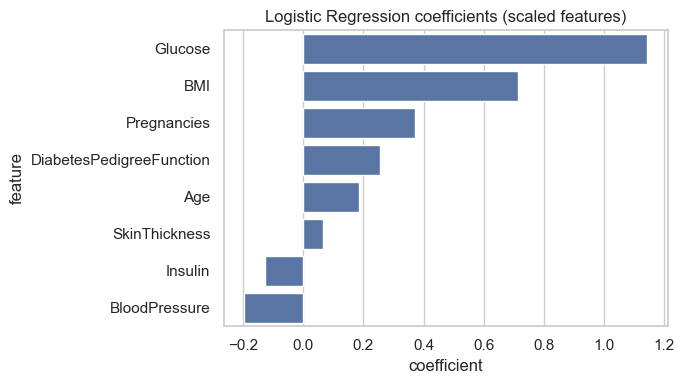

In [11]:
# -----------------------------
# 10. Inspecting coefficients
# -----------------------------

coef = log_reg.coef_[0]
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": coef,
}).sort_values(by="coefficient", ascending=False)

print("\nLogistic Regression coefficients (after scaling):")
display(feature_importance)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=feature_importance,
    x="coefficient",
    y="feature",
    orient="h",
)
plt.title("Logistic Regression coefficients (scaled features)")
plt.tight_layout()
plt.show()